In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Import CSV file of ETFs

etf_df = pd.read_csv('data/ETF prices.csv', parse_dates=True, infer_datetime_format=True)

In [3]:
# Drop unneeded columns from DataFrame

etf_df.drop(columns=['open', 'high', 'low', 'close', 'volume'], inplace=True)

In [4]:
# Create dataframe table with data starting from 2016

etf_2016 = etf_df.loc[etf_df['price_date'] >= "2016"]

In [5]:
# Create pivot table that displays the prices of each ETF by date

etf_pivot = etf_2016.pivot_table(index = ["price_date"], columns = "fund_symbol", values = "adj_close")

In [6]:
# Remove ETFs that don't have a full data sample over entire 5-year period

etf_pivot_df = etf_pivot.dropna(axis='columns')

In [7]:
#Find the daily returns of each ETF

etf_returns = etf_pivot_df.pct_change().dropna()

In [18]:
etf_returns

fund_symbol,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AGGY,...,YANG,YCL,YCS,YINN,YLD,YXI,YYY,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000000,0.001904,-0.011269,0.001019,0.005956,-0.001187,0.003491,-0.006016,0.023070,0.000000,...,0.014149,0.004137,-0.007028,-0.015707,0.003759,0.003024,0.007583,0.016113,-0.008136,-0.017007
2016-01-06,-0.015073,-0.019422,0.000000,-0.015275,-0.007730,-0.018419,-0.016622,-0.008742,-0.006938,0.004607,...,0.064836,0.010030,-0.009282,-0.064495,-0.004682,0.020771,0.000941,-0.009515,0.020507,-0.003968
2016-01-07,0.000000,-0.027772,-0.018831,-0.023164,-0.010608,-0.022700,-0.035377,-0.031886,-0.054148,0.000000,...,0.115973,0.013655,-0.015107,-0.115849,0.000000,0.040696,-0.014098,-0.039655,0.000402,-0.040000
2016-01-08,0.000000,-0.008415,-0.006566,-0.011645,-0.011057,-0.010530,-0.011410,-0.004905,0.010157,0.000000,...,0.029180,0.001749,-0.001427,-0.029743,-0.016933,0.011038,-0.005720,-0.030521,0.005323,0.044821
2016-01-11,-0.042293,0.000670,-0.031520,0.001071,0.001186,0.000939,-0.003710,-0.025352,-0.013711,0.000724,...,0.019850,-0.003144,0.003810,-0.019056,-0.006699,0.002495,-0.015340,-0.010317,-0.018382,0.016365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,-0.004388,-0.003013,-0.000777,-0.000283,0.001128,-0.000530,-0.008379,-0.002868,-0.002846,-0.004266,...,0.014846,-0.005039,0.004830,-0.013035,-0.003846,0.006427,-0.004147,0.000000,-0.019252,0.040679
2021-11-24,-0.006296,-0.000930,0.000000,0.000378,-0.002252,-0.004062,0.007214,-0.006232,0.006185,0.000779,...,-0.008192,-0.004431,0.004567,0.008491,0.000483,-0.002554,0.000000,0.000000,0.022338,0.012903
2021-11-26,-0.026295,-0.029672,-0.021767,-0.024351,-0.014392,-0.028196,-0.030489,-0.031356,-0.020331,0.007200,...,0.084366,0.038576,-0.040794,-0.083255,-0.005789,0.026248,-0.015467,-0.064454,0.030656,0.038591


In [8]:
# Import CSV file of 10-year Treasury rates data

tnx_df = pd.read_csv("data/^TNX.csv", parse_dates=True, infer_datetime_format=True)

In [9]:
# Set df index

tnx_index = tnx_df.set_index("Date")

In [10]:
# Drop irrelevant columns

tnx_index.drop(columns=['Open', "High", "Low", "Close", "Volume"], inplace=True)

In [11]:
# Drop Null Values

tnx_df.dropna(inplace=True)

In [12]:
# Concatenate TNX df with ETF df

tnx_etf = pd.concat([tnx_index, etf_pivot_df], join = "inner", axis = 1)

In [13]:
# Rename TNX column

tnx_etf.rename(columns={"Adj Close" : "TNX"}, inplace=True)

In [14]:
# Find daily returns of Dataframe and drop null values

tnx_etf_returns = tnx_etf.pct_change().dropna()

In [15]:
# Find sharpe ratio of each ETF

sharpe_ratio = ((tnx_etf_returns.mean()-tnx_etf_returns['TNX'].mean()) * 252)/(tnx_etf_returns.std() * np.sqrt(252))

In [16]:
sharpe_ratio.describe()

count    1072.000000
mean       -0.234428
std         1.708128
min       -33.753087
25%        -0.295856
50%         0.072202
75%         0.295121
max         1.066480
dtype: float64

In [32]:
sharpe_ratio.sort_values()

BIL    -33.753087
SHV    -31.811533
TFLO   -12.500062
SCHO    -7.398400
SHY     -7.315606
          ...    
USD      0.971001
ARKW     0.980935
ROM      1.000941
TECL     1.020744
SOXL     1.066480
Length: 1072, dtype: float64

<AxesSubplot:>

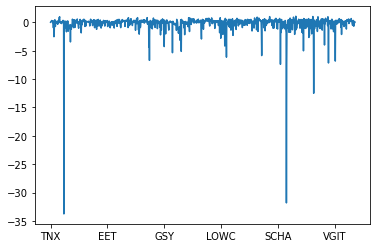

In [17]:
sharpe_ratio.plot()

In [37]:
covariance = tnx_etf_returns[['SOXL', 'SPY']].cov()

In [38]:
covariance

,SOXL,SPY
SOXL,0.003021,0.000509
SPY,0.000509,0.000129


In [39]:
covariance['SOXL']['SPY'] / covariance['SPY']['SPY']

3.9434033403650997

In [43]:
beta = tnx_etf_returns.cov()['SPY'] / tnx_etf_returns.cov()['SPY']['SPY']

In [46]:
beta[beta > 0].sort_values()

BIL     0.000035
GLD     0.000865
BAB     0.001070
USFR    0.001706
ISHG    0.002490
          ...   
BRZU    3.442192
TECL    3.469244
DPST    3.619037
GUSH    3.704050
SOXL    3.943403
Name: SPY, Length: 949, dtype: float64

In [49]:
beta['TLT']

KeyError: 'TLT'

In [50]:
etf_desc = pd.read_csv("data/ETFs.csv", parse_dates=True, infer_datetime_format=True)

In [51]:
etf_desc

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [62]:
tnx_etf_returns.columns

Index(['TNX', 'AADR', 'AAXJ', 'ACWF', 'ACWI', 'ACWV', 'ACWX', 'ADRE', 'AFK',
       'AFTY',
       ...
       'YANG', 'YCL', 'YCS', 'YINN', 'YLD', 'YXI', 'YYY', 'ZIVZF', 'ZROZ',
       'ZSL'],
      dtype='object', length=1072)

In [64]:
etf_desc_matched = etf_desc[etf_desc.fund_symbol.isin(tnx_etf_returns.columns)]

In [157]:
bond_etfs = etf_desc_matched[etf_desc_matched.fund_category.str.contains('Bond', na=False)]
bond_etfs

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
23,AGGY,ETF,US,NaN,American Century One Choice Blend+ 2020 Portfo...,USD,Intermediate-Term Bond,American Century Investments,PCX,NYSEArca,...,4.21,0.52,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,AGZD,ETF,US,NaN,American Century One Choice Blend+ 2025 Portfo...,USD,Nontraditional Bond,American Century Investments,NGM,NasdaqGM,...,1.80,0.52,15.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,ANGL,ETF,US,NaN,American Century One Choice Blend+ 2030 Portfo...,USD,High Yield Bond,American Century Investments,NGM,NasdaqGM,...,9.08,0.89,10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,BIL,ETF,US,MID CAP CORE EQUITY FUND - CLAS,Cavanal Hill Mid Cap Diverse Leadership Fund C...,USD,Ultrashort Bond,Cavanal Hill funds,PCX,NYSEArca,...,0.26,-2.05,-64.67,-0.16,NaN,0.04,0.72,0.24,-2.55,-90.31
130,BIV,ETF,US,"AB Cap Fund, Inc. - AB Emerging",AB Emerging Markets Multi-Asset Portfolio Class A,USD,Intermediate-Term Bond,AllianceBernstein,PCX,NYSEArca,...,4.02,0.58,1.88,-0.07,1.33,0.35,95.12,4.09,0.89,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,HYGH,ETF,US,MFS Blended Research Emerging M,MFS Blended Research Emerging Markets Equity F...,USD,High Yield Bond,MFS,PCX,NYSEArca,...,7.53,0.64,545.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,HYXU,ETF,US,MFS Blended Research Emerging M,MFS Blended Research Emerging Markets Equity F...,USD,High Yield Bond,MFS,BTS,BATS,...,10.52,0.48,4.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,IGBH,ETF,US,MFS Blended Research Growth Equ,MFS Blended Research Growth Equity Fund Class B,USD,Corporate Bond,MFS,PCX,NYSEArca,...,8.44,0.46,-23.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2259,LQDH,ETF,US,iShares S&P 500 Index Fund - Cl,iShares S&P 500 Index Fund Investor A Shares,USD,Corporate Bond,BlackRock,PCX,NYSEArca,...,6.21,0.49,171.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
positive_sharpe_bond_etfs = bond_etfs[bond_etfs.fund_sharpe_ratio_5years > 0]
positive_sharpe_bond_etfs

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
23,AGGY,ETF,US,NaN,American Century One Choice Blend+ 2020 Portfo...,USD,Intermediate-Term Bond,American Century Investments,PCX,NYSEArca,...,4.21,0.52,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,AGZD,ETF,US,NaN,American Century One Choice Blend+ 2025 Portfo...,USD,Nontraditional Bond,American Century Investments,NGM,NasdaqGM,...,1.80,0.52,15.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,ANGL,ETF,US,NaN,American Century One Choice Blend+ 2030 Portfo...,USD,High Yield Bond,American Century Investments,NGM,NasdaqGM,...,9.08,0.89,10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,BIV,ETF,US,"AB Cap Fund, Inc. - AB Emerging",AB Emerging Markets Multi-Asset Portfolio Class A,USD,Intermediate-Term Bond,AllianceBernstein,PCX,NYSEArca,...,4.02,0.58,1.88,-0.07,1.33,0.35,95.12,4.09,0.89,2.72
151,BLV,ETF,US,American Century Government Bon,American Century Government Bond Fund I Class,USD,Long-Term Bond,American Century Investments,PCX,NYSEArca,...,9.43,0.49,1.52,-1.23,2.92,0.62,89.30,9.24,0.74,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,HYG,ETF,US,MFS Blended Research Emerging M,MFS Blended Research Emerging Markets Equity F...,USD,High Yield Bond,MFS,PCX,NYSEArca,...,6.87,0.75,10.78,3.64,0.48,0.47,4.32,6.96,0.71,10.04
2158,HYGH,ETF,US,MFS Blended Research Emerging M,MFS Blended Research Emerging Markets Equity F...,USD,High Yield Bond,MFS,PCX,NYSEArca,...,7.53,0.64,545.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,HYXU,ETF,US,MFS Blended Research Emerging M,MFS Blended Research Emerging Markets Equity F...,USD,High Yield Bond,MFS,BTS,BATS,...,10.52,0.48,4.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,IGBH,ETF,US,MFS Blended Research Growth Equ,MFS Blended Research Growth Equity Fund Class B,USD,Corporate Bond,MFS,PCX,NYSEArca,...,8.44,0.46,-23.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
bond_beta = positive_sharpe_bond_etfs[['fund_symbol', 'fund_beta_5years']]

In [160]:
bond_beta[bond_beta.fund_beta_5years < 0]

,fund_symbol,fund_beta_5years
924,HYHG,-0.21
978,IGHG,-0.02
1551,RINF,-1.10
2207,IGBH,-0.16


In [146]:
etf_desc_matched[etf_desc_matched.fund_symbol == 'SPY'].fund_sharpe_ratio_5years

1762    1.08
Name: fund_sharpe_ratio_5years, dtype: float64

In [145]:
etf_desc_matched[etf_desc_matched.fund_sector_real_estate > 0.5].sort_values('fund_sector_real_estate')[['fund_symbol', 'fund_sector_real_estate', 'fund_yield', 'fund_sharpe_ratio_5years']]

,fund_symbol,fund_sector_real_estate,fund_yield,fund_sharpe_ratio_5years
927,HYLD,0.6642,0.0729,0.76
872,HAUZ,0.9593,0.0507,0.52
1254,MORT,0.9814,0.0665,0.39
2273,REM,0.9878,0.0600,0.41
837,GQRE,0.9917,0.0166,0.32
1977,VNQI,0.9921,0.0087,0.37
2301,WPS,0.9953,0.0241,0.37
396,DRW,0.9964,0.0587,0.34
972,IFGL,0.9974,0.0220,0.35
614,FFR,0.9989,NaN,0.32


In [92]:
bond_etfs.[bond_etfs.fund_symbol][sharpe_ratio[bond_etfs.fund_symbol] > 0]

ANGL    0.373673
LTPZ   -0.114653
SPLB    0.124011
VCLT    0.146695
Name: SPY, dtype: float64

In [74]:
etf_desc_matched[etf_desc_matched.fund_category.str.contains('International', na=False)]

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years


In [81]:
etf_desc_matched.fund_category.unique()

array(['Foreign Large Growth', 'Pacific/Asia ex-Japan Stk', nan,
       'Foreign Large Blend', 'Diversified Emerging Mkts',
       'Miscellaneous Region', 'China Region', 'Intermediate-Term Bond',
       'Trading--Leveraged Commodities', 'Short Government',
       'Nontraditional Bond', 'Industrials',
       'Allocation--70% to 85% Equity', 'Energy Limited Partnership',
       'High Yield Bond', 'Allocation--30% to 50% Equity',
       'Allocation--50% to 70% Equity', 'Health', 'Mid-Cap Growth',
       'Technology', 'Commodities Broad Basket',
       'Trading--Leveraged Equity', 'Ultrashort Bond',
       'Trading--Inverse Equity', 'Financial', 'Consumer Cyclical',
       'Long-Term Bond', 'Latin America Stock', 'Short-Term Bond',
       'World Bond', 'Large Value',
       'Emerging-Markets Local-Currency Bond', 'Large Blend',
       'Natural Resources', 'Foreign Large Value', 'Muni California Long',
       'Corporate Bond', 'Tactical Allocation', 'Equity Energy',
       'Trading--Miscel